## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()


median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()


variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()


stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()


sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [37]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
# Filter the DataFrame down only to those columns to chart
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")





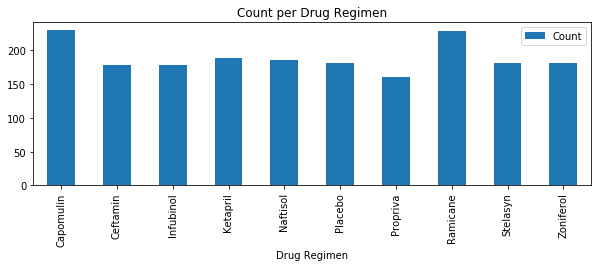

<Figure size 432x288 with 0 Axes>

In [38]:
# Use DataFrame.plot() in order to create a bar chart of the data
regimen_datapoints.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()

In [39]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
import matplotlib.pyplot as plt

# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# select column to convert to list here
drug_regimens = summary_df.index.tolist()
drug_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [40]:

# Convert regimen count into a list
regimen_count = (merge_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [41]:
x_axis = np.arange(len(regimen_count))

NameError: name 'np' is not defined

In [ ]:
# Define x-axis
x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")

## Pie plots

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [7]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


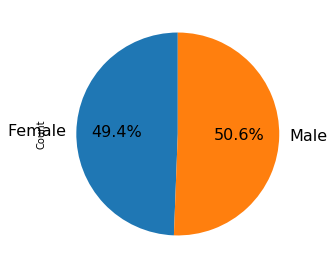

In [8]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert Columns into lists
gender_count = (merge_table.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

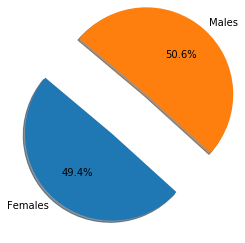

In [11]:
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["green", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, .5)

plt.pie(gender_count, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140);

## Quartiles, outliers and boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
sorted_df = merge_table.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [14]:
# Select data for Capomulin regimen and reset index
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [18]:
# Convert column "Tumor Volume" of the Capomulin regimen into a dataframe object
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# Convert column "Tumor Volume" of the Capomulin regimen into a dataframe object
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [26]:
# Selecting only 3 columns
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [27]:
# Calculate average tumor volume for each mouse in the Capomulin regimen
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [28]:
# Calculate average tumor volume for each mouse in the Capomulin regimen
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [32]:
# Set the 'Mouse ID' as our index
average_cap = average_cap.set_index('Mouse ID')

KeyError: "None of ['Mouse ID'] are in the columns"

In [33]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

KeyError: 'Average Volume'

In [34]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

import matplotlib.pyplot as plt

In [35]:
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [36]:
# Add the linear regression equation and line to plot
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

KeyError: 'Average Volume'